## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [37]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [38]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("Resources/bitstamp.csv"),
                       index_col="Timestamp",
                       parse_dates=True,
                       infer_datetime_format=True)
                    

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [39]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [40]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("Resources/coinbase.csv"),
                      index_col="Timestamp",
                      parse_dates=True,
                      infer_datetime_format=True)

In [41]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [42]:
# For the bitstamp DataFrame, identify the frequency of NaN withinthe DateFrame

bitstamp.isnull().sum()


Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [43]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [44]:
# Use the str.replace function to remove the dollar sign, $

bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "", regex=False)


### Step 3: Convert the data type of the Close column to a `float`.

In [45]:
# Convert the Close data type to a float. Confirm using the dtypes function.

bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [46]:
# Review the data for duplicate values, and drop them if necessary

bitstamp.duplicated().sum()


0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [47]:
# Repeat Steps 1–4 for the coinbase DataFrame
# For the coinbase DataFrame, identify the frequency of Nan in the DataFrame

coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [48]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame

coinbase = coinbase.dropna()
coinbase.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [49]:
# Use dtypes function to identify data types inthe coinbase DataFrame

coinbase.dtypes


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [50]:
# Use the str.replace function to remove the dollar sign, $. Confirm data type using the dtypes function if needed.

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("string")
coinbase.dtypes


Open              float64
High              float64
Low               float64
Close              string
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [51]:

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "", regex=False)
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")


In [52]:
#Confirm data type of "Close" was successfully converted to float using the dtypes function.

coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [99]:
# Review the data for duplicate values, and drop them if necessary

coinbase.duplicated().sum()


0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [55]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame

bitstamp_sliced = bitstamp.loc[:, "Close"]


# Review the first five rows of the DataFrame

bitstamp_sliced.head()


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [56]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame

coinbase_sliced = coinbase.loc[:, "Close"]


# Review the first five rows of the DataFrame

coinbase_sliced.head()


Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [57]:
# Generate the summary statistics for the bitstamp DataFrame

bitstamp.describe()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [58]:
# Generate the summary statistics for the coinbase DataFrame

coinbase.describe()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

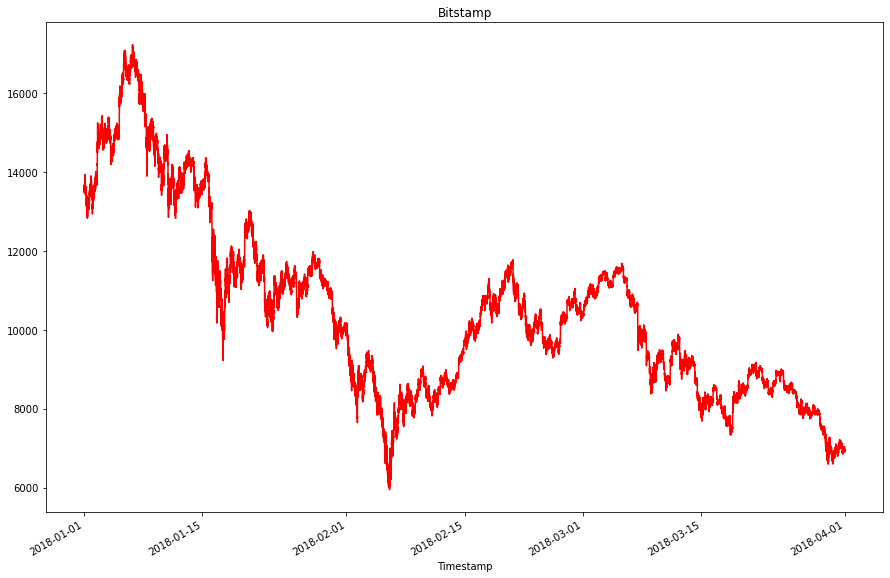

In [59]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

bitstamp_sliced.plot(figsize=(15, 10), title="Bitstamp", color="red")


<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

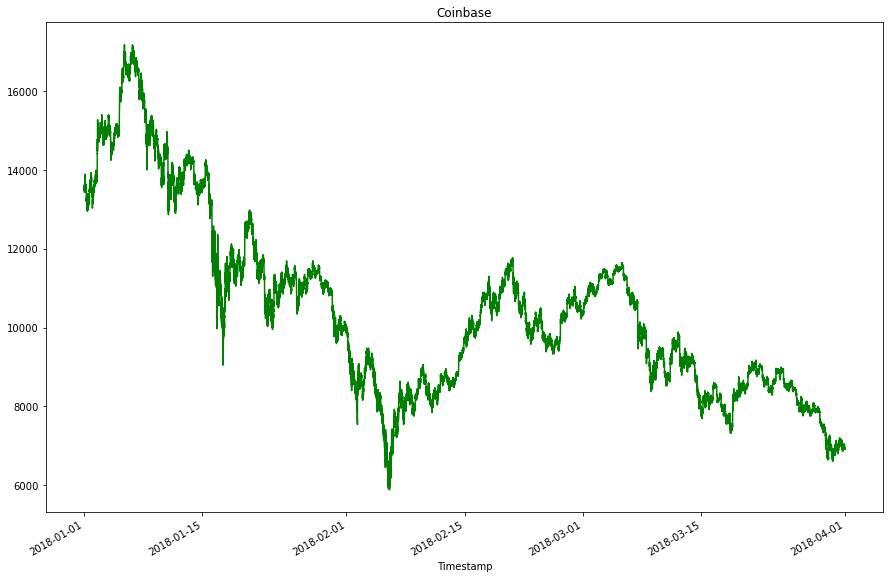

In [60]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

coinbase_sliced.plot(figsize=(15, 10), title="Coinbase", color="green")


<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

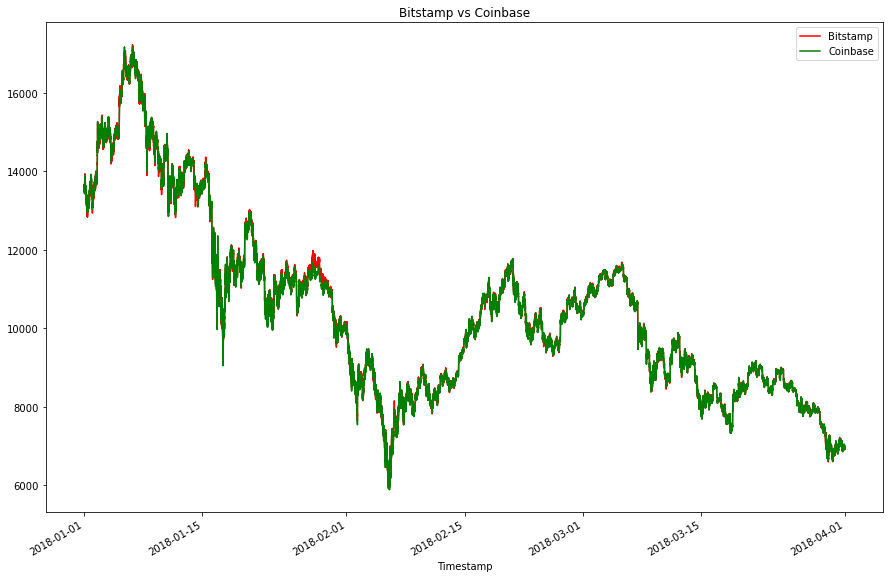

In [61]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_sliced.plot(legend=True, figsize=(15, 10), title="Bitstamp vs Coinbase", color="red", label="Bitstamp")

coinbase_sliced.plot(legend=True, figsize=(15, 10), color="green", label="Coinbase")


<AxesSubplot:title={'center':'January 2018'}, xlabel='Timestamp'>

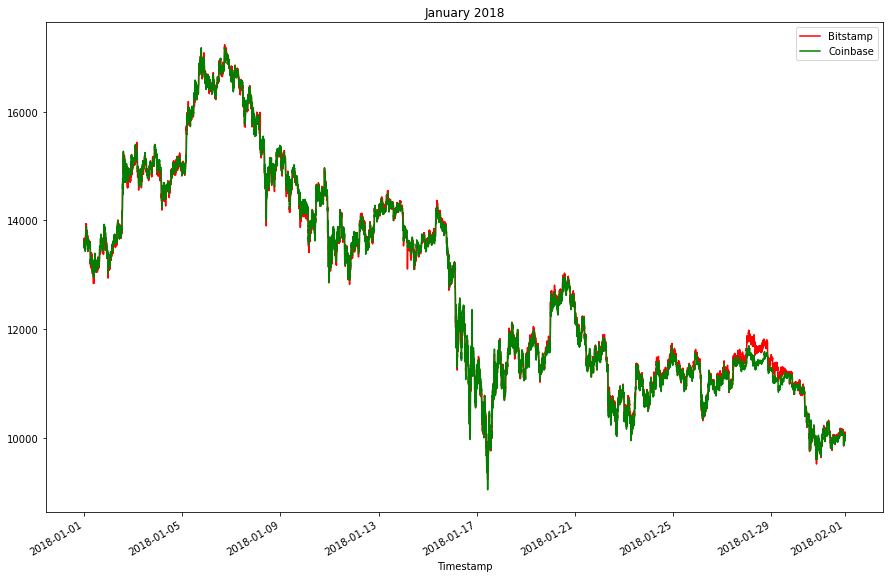

In [62]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bitstamp_sliced.loc["2018-01-01" : "2018-01-31"].plot(
    legend=True, figsize=(15, 10), title="January 2018", color="red", label="Bitstamp")

coinbase_sliced.loc["2018-01-01" : "2018-01-31"].plot(
    legend=True, figsize=(15, 10), title="January 2018", color="green", label="Coinbase")


<AxesSubplot:title={'center':'March 2018'}, xlabel='Timestamp'>

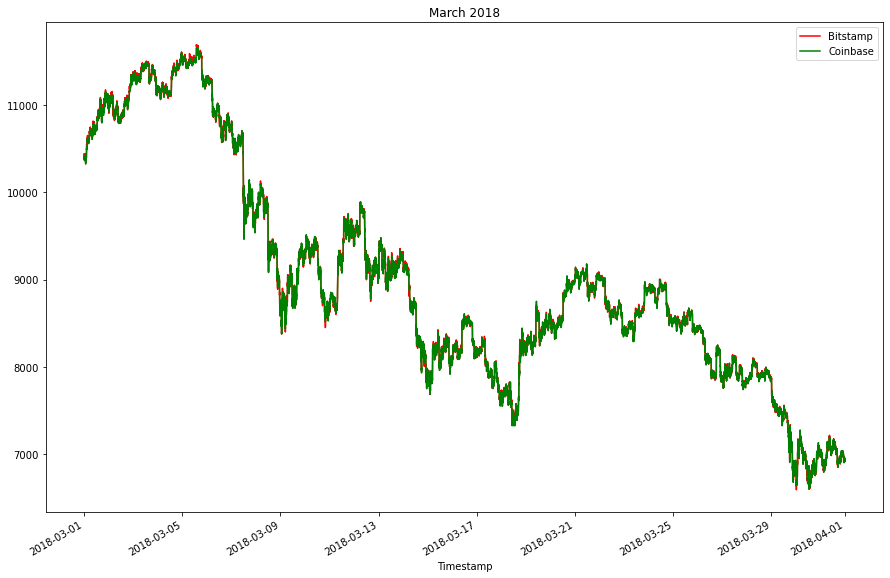

In [63]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

bitstamp_sliced.loc["2018-03-01" : "2018-03-31"].plot(
    legend=True, figsize=(15, 10), title="March 2018", color="red", label="Bitstamp")

coinbase_sliced.loc["2018-03-01" : "2018-03-31"].plot(
    legend=True, figsize=(15, 10), color="green", label="Coinbase")


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on the visualizations of one month intervals, the degree of spread has decreased as time progressed. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 01 2018'}, xlabel='Timestamp'>

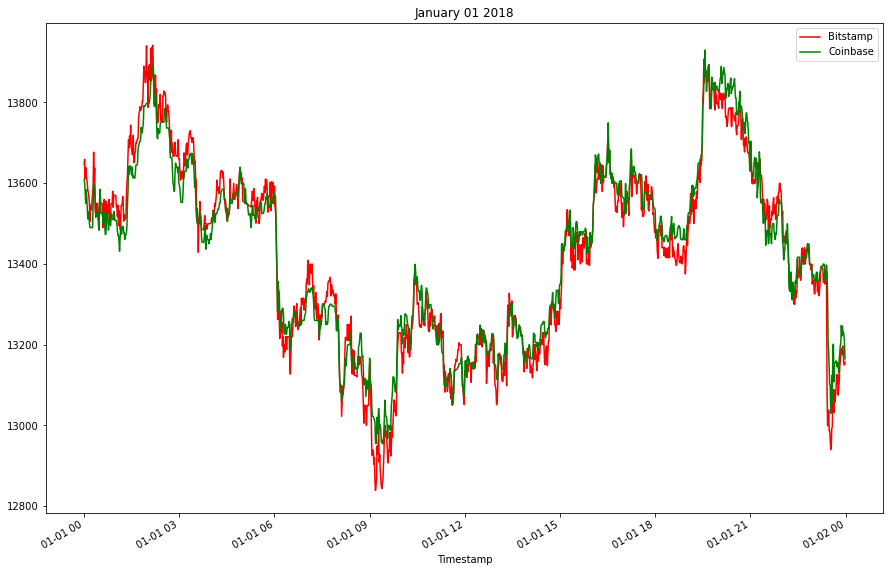

In [64]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp_sliced.loc["2018-01-01"].plot(
    legend=True, figsize=(15, 10), title="January 01 2018", color="red", label="Bitstamp")

coinbase_sliced.loc["2018-01-01"].plot(
    legend=True, figsize=(15, 10), color="green", label="Coinbase")


In [65]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early = coinbase_sliced.loc["2018-01-01"] - bitstamp_sliced.loc["2018-01-01"]


# Generate summary statistics for the early DataFrame

arbitrage_spread_early.describe()


count    1421.000000
mean        5.767368
std        46.214511
min      -142.000000
25%       -26.890000
50%         5.480000
75%        36.000000
max       319.990000
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

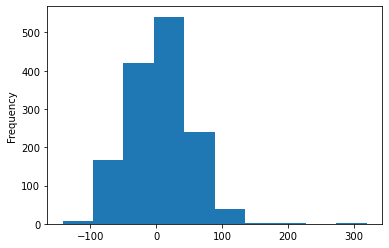

In [66]:
# Visualize the arbitrage spread from early in the dataset in a box plot

arbitrage_spread_early.plot(kind="hist")


<AxesSubplot:title={'center':'February 15 2018'}, xlabel='Timestamp'>

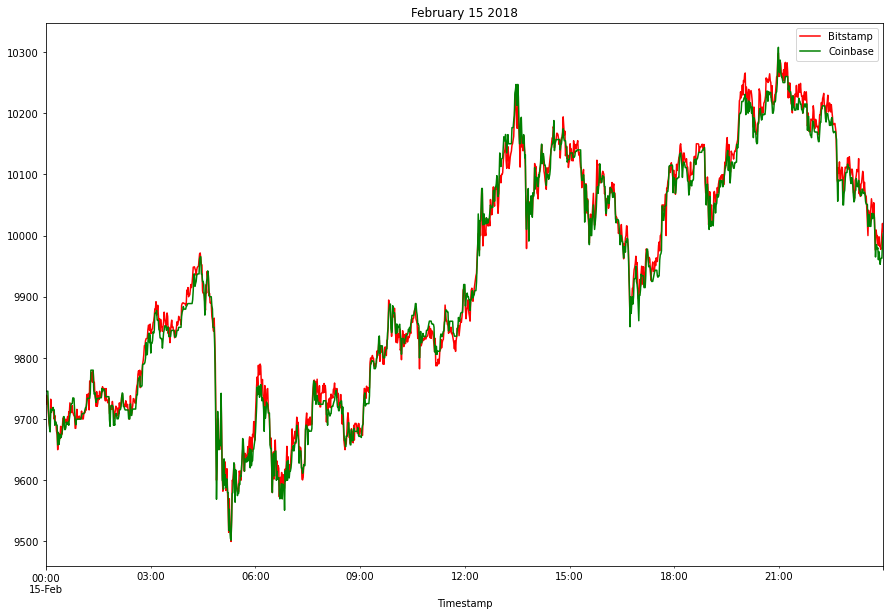

In [67]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp_sliced.loc["2018-02-15"].plot(
    legend=True, figsize=(15, 10), title="February 15 2018", color="red", label="Bitstamp")

coinbase_sliced.loc["2018-02-15"].plot(
    legend=True, figsize=(15, 10), color="green", label="Coinbase")


In [68]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_middle = coinbase_sliced.loc["2018-02-15"] - bitstamp_sliced.loc["2018-02-15"]


# Generate summary statistics 

arbitrage_spread_middle.describe()


count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

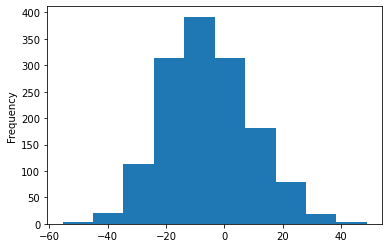

In [69]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot

arbitrage_spread_middle.plot(kind="hist")


<AxesSubplot:title={'center':'March 28 2018'}, xlabel='Timestamp'>

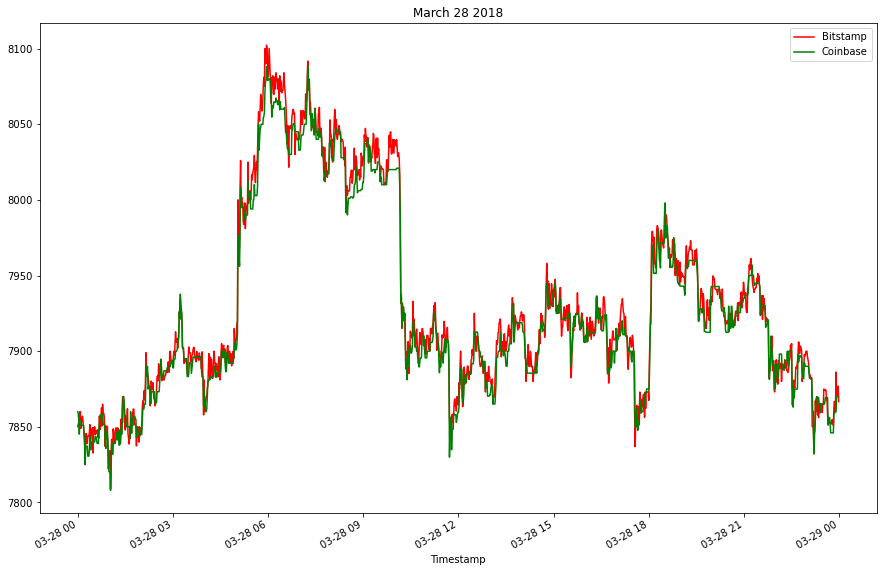

In [70]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bitstamp_sliced.loc["2018-03-28"].plot(
    legend=True, figsize=(15, 10), title="March 28 2018", color="red", label="Bitstamp")

coinbase_sliced.loc["2018-03-28"].plot(
    legend=True, figsize=(15, 10), color="green", label="Coinbase")


In [71]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_late = coinbase_sliced.loc["2018-03-28"] - bitstamp_sliced.loc["2018-03-28"]


# Generate summary statistics for the late DataFrame

arbitrage_spread_late.describe()


count    1438.00000
mean       -4.42427
std         7.44509
min       -28.73000
25%        -8.99000
50%        -4.53500
75%         0.48000
max        26.30000
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

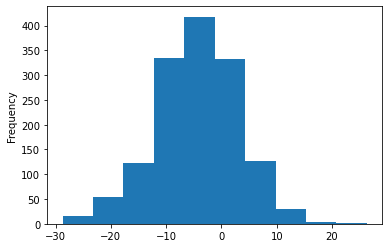

In [72]:
# Visualize the arbitrage spread from late in the dataset in a box plot

arbitrage_spread_late.plot(kind="hist")


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [73]:
# Use a conditional statement to generate the summary statistics for arbitrage_spread DataFrame, early timeframe.

arbitrage_spread_early_return = arbitrage_spread_early[arbitrage_spread_early > 0]

arbitrage_spread_early_return.describe()


count    782.000000
mean      38.672634
std       31.451187
min        0.010000
25%       15.950000
50%       32.610000
75%       53.627500
max      319.990000
Name: Close, dtype: float64

In [74]:
# Use a conditional statement to generate the summary statistics for arbitrage_spread DataFrame, middle timeframe

arbitrage_spread_middle_return = arbitrage_spread_middle[arbitrage_spread_middle > 0]

arbitrage_spread_middle_return.describe()


count    466.000000
mean      11.267489
std        8.653952
min        0.010000
25%        4.372500
50%        9.795000
75%       15.797500
max       48.800000
Name: Close, dtype: float64

In [75]:
# Use a conditional statement to generate the summary statistics for arbitrage_spread DataFrame, late timeframe

arbitrage_spread_late_return = arbitrage_spread_late[arbitrage_spread_late > 0]

arbitrage_spread_late_return.describe()


count    406.000000
mean       4.214557
std        3.808443
min        0.010000
25%        1.372500
50%        3.070000
75%        5.985000
max       26.300000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [76]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

arbitrage_spread_early_return_profits = arbitrage_spread_early_return / bitstamp_sliced.loc["2018-01-01"]


# Review the spread return DataFrame

arbitrage_spread_early_return_profits.describe()


count    7.820000e+02
mean     2.909132e-03
std      2.400203e-03
min      7.246377e-07
25%      1.187666e-03
50%      2.460052e-03
75%      4.021934e-03
max      2.461649e-02
Name: Close, dtype: float64

In [77]:
# Repeat for the middle date in the dataset

arbitrage_spread_middle_return_profits = arbitrage_spread_middle_return / bitstamp_sliced.loc["2018-02-15"]


arbitrage_spread_middle_return_profits.describe()


count    466.000000
mean       0.001135
std        0.000865
min        0.000001
25%        0.000437
50%        0.000990
75%        0.001595
max        0.004880
Name: Close, dtype: float64

In [78]:
# Repeat for the late date in the dataset

arbitrage_spread_late_return_profits = arbitrage_spread_late_return / bitstamp_sliced.loc["2018-03-28"]

arbitrage_spread_late_return_profits.describe()


count    406.000000
mean       0.000533
std        0.000483
min        0.000001
25%        0.000171
50%        0.000389
75%        0.000758
max        0.003345
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [79]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_early = arbitrage_spread_early_return_profits[arbitrage_spread_early_return_profits > .01]


# Review the first five profitable trades

profitable_trades_early.head()


Timestamp
2018-01-01 09:10:00    0.011455
2018-01-01 23:25:00    0.022465
2018-01-01 23:26:00    0.024616
2018-01-01 23:27:00    0.015948
2018-01-01 23:28:00    0.011261
Name: Close, dtype: float64

In [80]:
# Repeat for the middle date in the dataset

profitable_trades_middle = arbitrage_spread_middle_return_profits[arbitrage_spread_middle_return_profits > .01]

profitable_trades_middle.head()


Series([], Name: Close, dtype: float64)

In [81]:
# Repeat for the late date in the dataset

profitable_trades_late = arbitrage_spread_late_return_profits[arbitrage_spread_late_return_profits > .01]

profitable_trades_late.head()


Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [82]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

profitable_trades_early.describe()


count    7.000000
mean     0.015453
std      0.005833
min      0.010427
25%      0.011358
50%      0.012001
75%      0.019207
max      0.024616
Name: Close, dtype: float64

In [83]:
# Repeat for the middle date in the dataset

profitable_trades_middle.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [84]:
# Repeat for the late date in the dataset

profitable_trades_late.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [85]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profit_early = profitable_trades_early * bitstamp_sliced.loc["2018-01-01"]


# Drop any missing values from the profit DataFrame

profit_per_trade_early = profit_early.dropna()


# View the early profit DataFrame

profit_per_trade_early.head(10)


Timestamp
2018-01-01 09:10:00    147.33
2018-01-01 23:25:00    293.89
2018-01-01 23:26:00    319.99
2018-01-01 23:27:00    207.33
2018-01-01 23:28:00    146.82
2018-01-01 23:29:00    155.86
2018-01-01 23:31:00    135.18
Name: Close, dtype: float64

In [86]:
# Repeat for the middle date in the dataset

profit_middle = profitable_trades_middle * bitstamp_sliced.loc["2018-02-15"]

profit_per_trade_middle = profit_middle.dropna()

profit_per_trade_middle.head()


Series([], Name: Close, dtype: float64)

In [87]:
# Repeat for the late date in the dataset

profit_late = profitable_trades_late * bitstamp_sliced.loc["2018-03-28"]

profit_per_trade_late = profit_late.dropna()

profit_per_trade_late.head()


Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [88]:
# Generate the summary statistics for the early profit per trade DataFrame

profit_per_trade_early.describe()


count      7.000000
mean     200.914286
std       76.390469
min      135.180000
25%      147.075000
50%      155.860000
75%      250.610000
max      319.990000
Name: Close, dtype: float64

In [89]:
# Repeat for the middle date in the dataset

profit_per_trade_middle.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [90]:
# Repeat for the late date in the dataset

profit_per_trade_late.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'1.1.18 Profits per Trade'}, xlabel='Timestamp'>

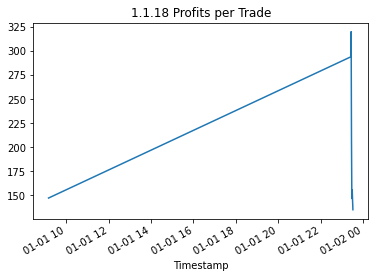

In [91]:
# Plot the results for the early profit per trade DataFrame

profit_per_trade_early.plot(title="1.1.18 Profits per Trade")


<AxesSubplot:title={'center':'2.15.18 Profits per Trade'}, xlabel='Timestamp'>

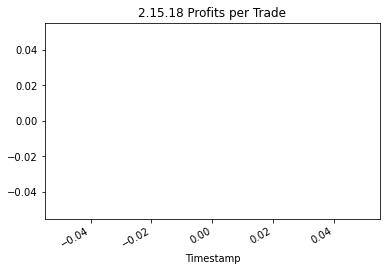

In [92]:
# Repeat for the middle date in the dataset

profit_per_trade_middle.plot(title="2.15.18 Profits per Trade")


<AxesSubplot:title={'center':'3.28.18 Profits per Trade'}, xlabel='Timestamp'>

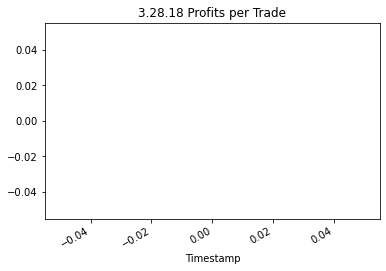

In [93]:
# Repeat for the late date in the dataset

profit_per_trade_late.plot(title="3.28.18 Profits per Trade")


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [94]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame

profit_per_trade_early.sum()

    ## No profits calulated for middle and late timeframes; skip this step ##


1406.3999999999996

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [95]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame

cumulative_profit_early = profit_per_trade_early.cumsum()


<AxesSubplot:title={'center':'Cum Profits Early'}, xlabel='Timestamp'>

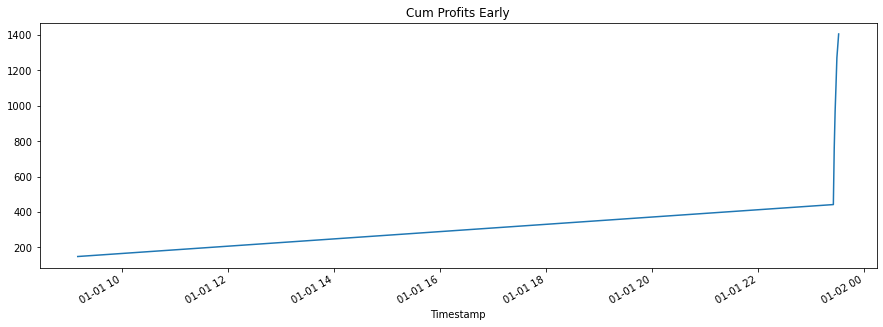

In [96]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame

cumulative_profit_early.plot(figsize=(15, 5), title="Cum Profits Early")


<AxesSubplot:title={'center':'Cum Profits Middle'}, xlabel='Timestamp'>

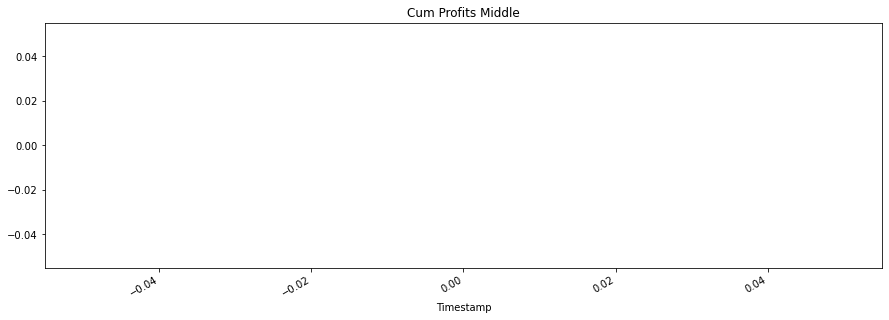

In [97]:
# Create plot visualization for middle timeframe to show no profits

cumulative_profit_middle = profit_per_trade_middle.cumsum()

cumulative_profit_middle.plot(figsize=(15, 5), title="Cum Profits Middle")


<AxesSubplot:title={'center':'Cum Profits Late'}, xlabel='Timestamp'>

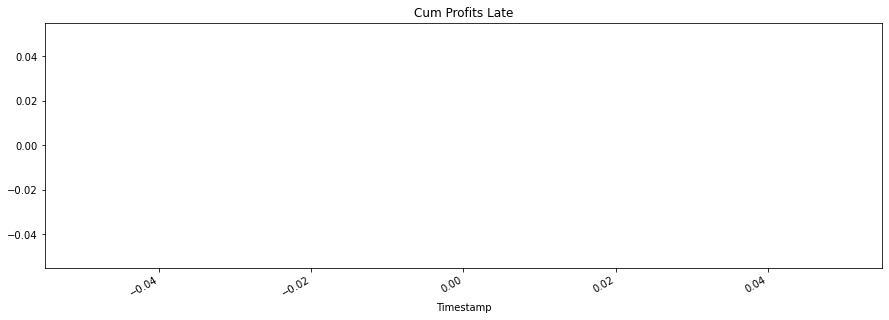

In [98]:
# Create plot visualization for late timeframe to show no profits

cumulative_profit_late = profit_per_trade_late.cumsum()

cumulative_profit_late.plot(figsize=(15, 5), title="Cum Profits Late")


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The arbitrage opportunites declined rapidly over time; there were no arbitrage opportunites after the early dates of the timeframe. 